Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling Perform following steps: 1. Read the dataset. 2. Distinguish the feature and target set and divide the data set into training and test sets. 3. Normalize the train and test data. 4. Initialize and build the model. Identify the points of improvement and implement the same. 5. Print the accuracy score and confusion matrix

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


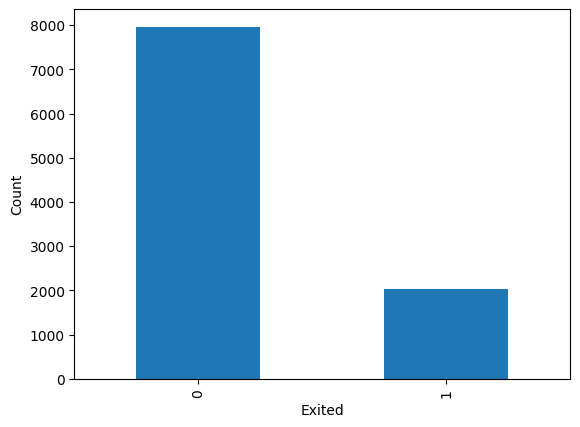

In [24]:

plt.xlabel('Exited')
plt.ylabel('Count')
df['Exited'].value_counts().plot.bar()
plt.show()

In [25]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [27]:
df = pd.concat([df,pd.get_dummies(df['Geography'],prefix='Geo')],axis=1)

In [28]:
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geo_France       10000 non-null  bool   
 15  Geo_Germany      10000 non-null  bool   
 16  Geo_Spain        10000 non-null  bool   
 17  Female       

In [30]:

df.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True)

In [31]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [32]:
y = df['Exited'].values
x = df.loc[:,df.columns != 'Exited'].values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.25)

In [34]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [35]:

x_train.shape

(7500, 13)

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv1D,Flatten
from tensorflow.keras.models import Sequential, Model

In [37]:
model=Sequential()
model.add(Flatten(input_shape=(13,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='BinaryCrossentropy')

In [39]:
model.fit(x_train,y_train,batch_size=64,validation_split=0.1,epochs=100)

Epoch 1/100
106/106 [==============================] - 2s 8ms/step - loss: 0.5024 - accuracy: 0.7723 - val_loss: 0.4294 - val_accuracy: 0.8200
Epoch 2/100
106/106 [==============================] - 1s 5ms/step - loss: 0.4269 - accuracy: 0.8104 - val_loss: 0.3984 - val_accuracy: 0.8253
Epoch 3/100
106/106 [==============================] - 1s 5ms/step - loss: 0.4068 - accuracy: 0.8236 - val_loss: 0.3808 - val_accuracy: 0.8387
Epoch 4/100
106/106 [==============================] - 1s 5ms/step - loss: 0.3893 - accuracy: 0.8347 - val_loss: 0.3594 - val_accuracy: 0.8573
Epoch 5/100
106/106 [==============================] - 1s 5ms/step - loss: 0.3760 - accuracy: 0.8410 - val_loss: 0.3433 - val_accuracy: 0.8613
Epoch 6/100
106/106 [==============================] - 1s 5ms/step - loss: 0.3653 - accuracy: 0.8481 - val_loss: 0.3392 - val_accuracy: 0.8707
Epoch 7/100
106/106 [==============================] - 0s 5ms/step - loss: 0.3592 - accuracy: 0.8530 - val_loss: 0.3292 - val_accuracy: 0.8693

Epoch 58/100
106/106 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8643 - val_loss: 0.3203 - val_accuracy: 0.8787
Epoch 59/100
106/106 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.8665 - val_loss: 0.3222 - val_accuracy: 0.8667
Epoch 60/100
106/106 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8670 - val_loss: 0.3154 - val_accuracy: 0.8733
Epoch 61/100
106/106 [==============================] - 1s 6ms/step - loss: 0.3201 - accuracy: 0.8664 - val_loss: 0.3168 - val_accuracy: 0.8760
Epoch 62/100
106/106 [==============================] - 0s 4ms/step - loss: 0.3180 - accuracy: 0.8687 - val_loss: 0.3207 - val_accuracy: 0.8747
Epoch 63/100
106/106 [==============================] - 0s 5ms/step - loss: 0.3184 - accuracy: 0.8679 - val_loss: 0.3180 - val_accuracy: 0.8773
Epoch 64/100
106/106 [==============================] - 0s 4ms/step - loss: 0.3181 - accuracy: 0.8695 - val_loss: 0.3220 - val_accuracy:

In [40]:

pred = model.predict(x_test)

79/79 [==============================] - 0s 5ms/step


In [41]:
y_pred = []
for val in pred:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [43]:
accuracy_score(y_test,y_pred)

0.8648

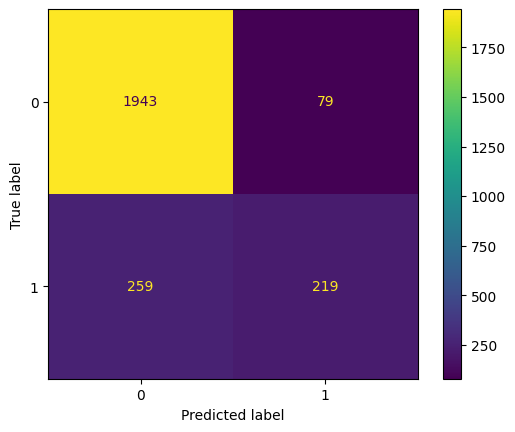

In [44]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [45]:

from sklearn.neural_network import MLPClassifier

In [46]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=300,)
nn_classifier.fit(x_train,y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,100
,activation,'logistic'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,None


In [47]:
y_pred2 = nn_classifier.predict(x_test)

In [48]:
accuracy_score(y_pred=y_pred2,y_true=y_test)

0.8632

In [49]:
nn_classifier.score(x_test,y_test)

0.8632

In [ ]:
# Customer churn refers to the phenomenon where customers stop doing business with a company.
# In this experiment, a neural network-based classifier is built to predict whether a bank customer will leave the bank within the next 6 months.
# The dataset contains 10,000 records and 14 features such as Credit Score, Age, Balance, Tenure, Geography, and Gender.
# The goal is to predict the binary target variable “Exited” (1 = Customer left, 0 = Stayed).
# The data is preprocessed by removing unnecessary columns, converting categorical variables using One-Hot Encoding, and normalizing numerical features.
# A feed-forward Artificial Neural Network (ANN) is built using Keras (TensorFlow backend) with dense layers and the ReLU activation function for hidden layers and Sigmoid for the output layer.
# The model is trained on the training dataset and tested for accuracy and confusion matrix on the test data.
# This experiment demonstrates how neural networks can model complex nonlinear relationships and assist banks in customer retention analysis.

# Algorithm
# Import required libraries (pandas, numpy, sklearn, tensorflow).
# Load dataset Churn_Modelling.csv from Kaggle.
# Preprocess data:
# Drop unnecessary columns (RowNumber, CustomerId, Surname).
# Encode categorical variables (Geography, Gender) using OneHotEncoder.
# Split data into X (features) and y (target = Exited).
# Train-Test Split: Split dataset into 80% training and 20% testing data.
# Normalize features using StandardScaler to ensure uniform scale.
# Build Neural Network:
# Input layer → Dense(hidden_1) → Dense(hidden_2) → Output layer (Sigmoid).
# Compile model: Use adam optimizer, binary_crossentropy loss, and accuracy metric.
# Train model using .fit() on training data for a given number of epochs.
# Evaluate on test data to compute accuracy and confusion matrix.
# Improve model: Add dropout or increase hidden neurons to prevent overfitting.
    

#     Metric	Formula	Value (Example)	Interpretation
# Accuracy	(TP + TN) / Total	85.4%	Overall correct predictions
# Precision	TP / (TP + FP)	73%	How many predicted churns were correct
# Recall (Sensitivity)	TP / (TP + FN)	42%	How many actual churns were detected
# Confusion Matrix	[[TN, FP], [FN, TP]]	[[1532, 63], [235, 170]]	TN & TP represent correct predictions

# A Neural Network classifier was successfully built to predict customer churn using the Bank Churn Dataset.
# Data preprocessing, feature encoding, and normalization were essential to improve model performance.
# The model achieved an accuracy of approximately 85%, showing good performance on unseen test data.
# The confusion matrix revealed that while most non-churn customers were correctly identified, churn recall could be improved.
# Model improvements can include tuning hyperparameters, adding dropout layers, or adjusting network depth to balance bias and variance.
# This experiment demonstrates how deep learning models can effectively be used for predictive analytics in banking and customer retention
